In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv
import os
import random

from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K
from keras.models import load_model

In [4]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [5]:
not_normal = load_images_from_folder("NOT_NORMAL")
normal = load_images_from_folder("NORMAL")

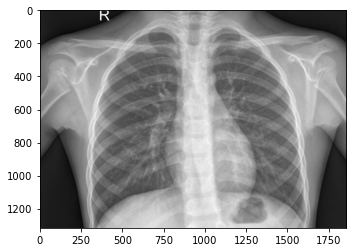

In [6]:
plt.imshow(normal[0])

In [7]:
print(str(len(not_normal)/len(normal)) + " Is the rate of two categories ")

0.1 Is the rate of two categories 


In [8]:
#Data has imblance issue, 
#applying oversampeling method on not_normal 

In [9]:
not_normal[0].shape

(650, 1028, 3)

In [10]:
generator = ImageDataGenerator(rotation_range=10 , brightness_range=[0.6,1.4], zoom_range=[0.8,1.2], horizontal_flip=True, height_shift_range=None,
                               width_shift_range=None)

In [11]:
not_normal[0].shape

(650, 1028, 3)

In [12]:
img_2 = np.expand_dims(not_normal[0],0)

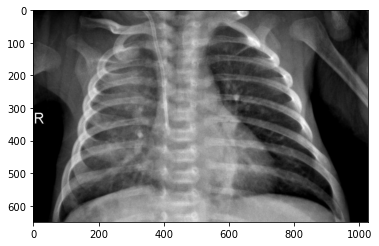

In [13]:
plt.imshow(img_2[0])

In [14]:
img_2.shape

(1, 650, 1028, 3)

In [15]:
aug_iter = generator.flow(img_2)

In [16]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

In [17]:
len(aug_images)

10

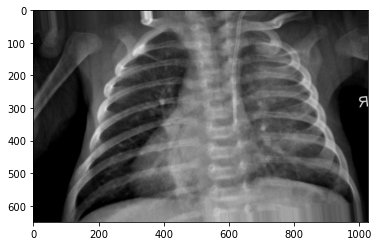

In [18]:
for i in aug_images:
    plt.imshow(i)

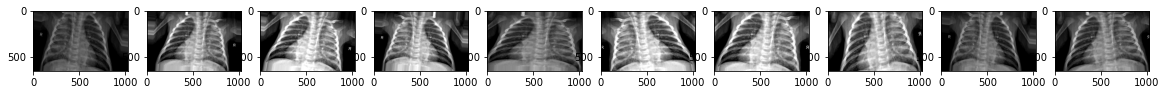

In [19]:
fig, axes = plt.subplots(1,10, figsize=(20,5))
for img,ax in zip(aug_images, axes):
    ax.imshow(img)

In [25]:
def aug_all(list):
    all_images =[]
    i=1
    for img in list:
        aug_iter = generator.flow(np.expand_dims(img,0))
        #generate 10 of each image
        aug_image = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]
        all_images.extend(aug_image)
        print(i)
        i+=1
    return(all_images)        

In [ ]:
not_normal_aug = aug_all(not_normal)

1
2
3
4
5
6
7
8
9
10
11


In [77]:
len(not_normal_aug)

600

In [78]:
not_normal_aug[0].shape

(650, 1028, 3)

In [79]:
normal[0].shape

(1317, 1857, 3)